In [14]:
import numpy as np

def linear_slope(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


def slopes_at_center(x, y, center, window_sizes):
    N = len(x)
    slopes = np.full(len(window_sizes), np.nan)

    for k, w in enumerate(window_sizes):
        h = w // 2
        if center - h < 0 or center + h >= N:
            continue
        idx = slice(center - h, center + h + 1)
        slopes[k] = linear_slope(x[idx], y[idx])

    return slopes


def sliding_window_slopes(x, y, window_sizes):
    N = len(x)
    slopes = np.full((N, len(window_sizes)), np.nan)

    for c in range(N):
        slopes[c] = slopes_at_center(x, y, c, window_sizes)

    return slopes


In [32]:
np.random.seed(0)

N = 1000
x = np.arange(N)

true_slope = 0.01 * np.sin(x / 40.0) + 0.002 * x / N
y = true_slope * x + 0.5 * np.random.randn(N)

window_sizes = np.array(list(range(200))) * 2 + 1

slopes = sliding_window_slopes(x, y, window_sizes)


C:\Users\Zeroint\AppData\Local\Temp\ipykernel_53152\4088361788.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)


In [33]:
import matplotlib.pyplot as plt

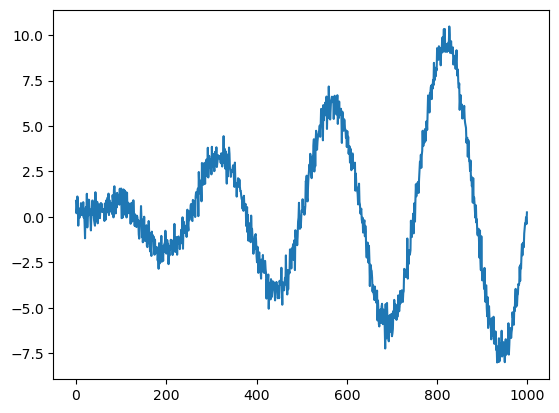

In [34]:
plt.plot(x,y)

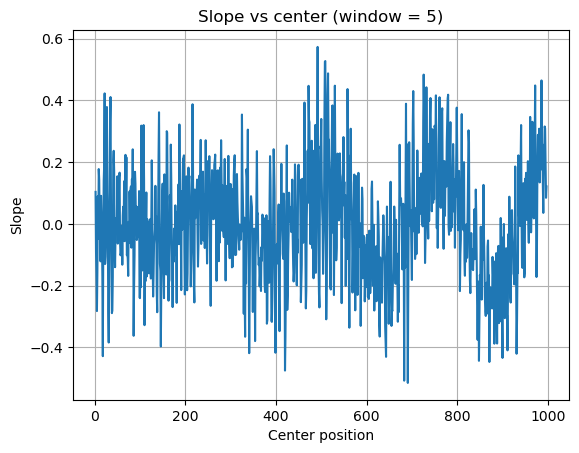

In [35]:
k = 2  # window_sizes[k]

plt.figure()
plt.plot(slopes[:, k])
plt.xlabel("Center position")
plt.ylabel("Slope")
plt.title(f"Slope vs center (window = {window_sizes[k]})")
plt.grid(True)
plt.show()


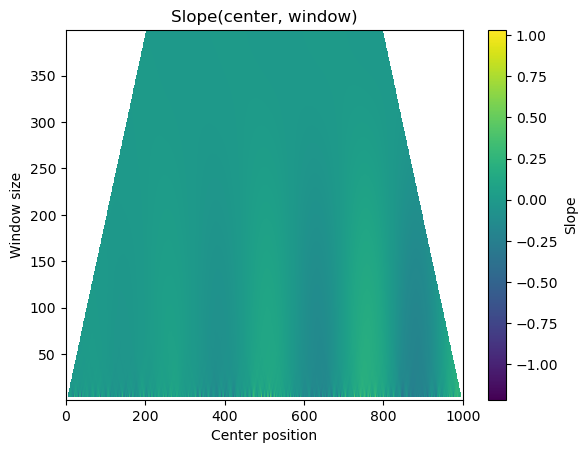

In [36]:
plt.figure()
plt.imshow(
    slopes.T,
    aspect='auto',
    origin='lower',
    extent=[0, N, window_sizes[0], window_sizes[-1]]
)
plt.colorbar(label="Slope")
plt.xlabel("Center position")
plt.ylabel("Window size")
plt.title("Slope(center, window)")
plt.show()


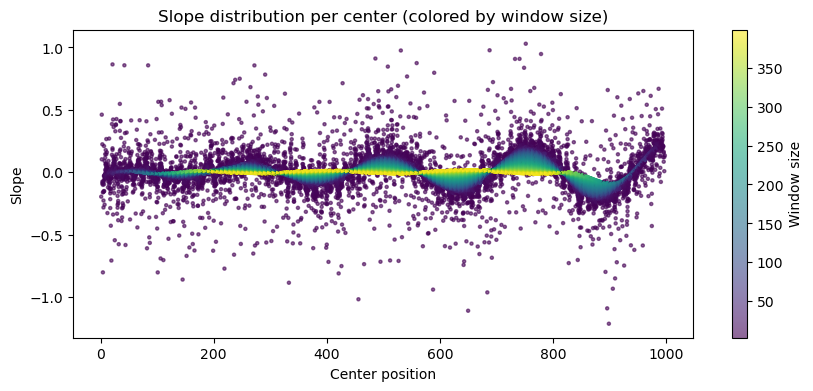

In [37]:
import matplotlib.pyplot as plt
import numpy as np

N, num_windows = slopes.shape

centers = np.repeat(np.arange(N), num_windows)
slopes_flat = slopes.reshape(-1)
windows_flat = np.tile(window_sizes, N)

# NaN 제거
mask = ~np.isnan(slopes_flat)

plt.figure(figsize=(10, 4))
sc = plt.scatter(
    centers[mask],
    slopes_flat[mask],
    c=windows_flat[mask],
    cmap='viridis',
    s=5,
    alpha=0.6
)

plt.colorbar(sc, label="Window size")
plt.xlabel("Center position")
plt.ylabel("Slope")
plt.title("Slope distribution per center (colored by window size)")
plt.show()


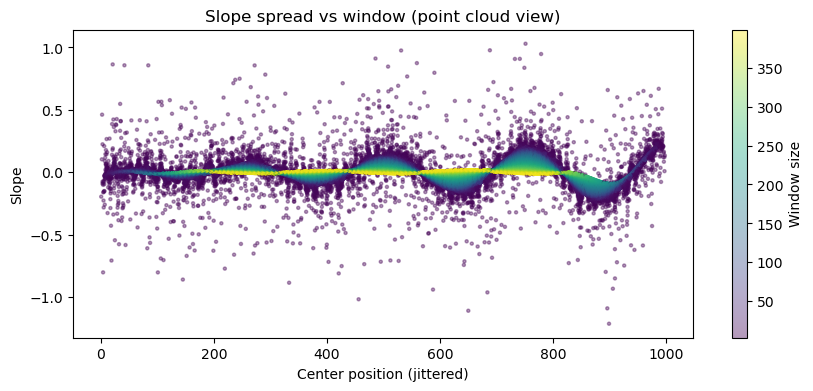

In [38]:
jitter = 0.2 * np.random.randn(len(centers))

plt.figure(figsize=(10, 4))
plt.scatter(
    centers[mask] + jitter[mask],
    slopes_flat[mask],
    c=windows_flat[mask],
    cmap='viridis',
    s=5,
    alpha=0.4
)

plt.colorbar(label="Window size")
plt.xlabel("Center position (jittered)")
plt.ylabel("Slope")
plt.title("Slope spread vs window (point cloud view)")
plt.show()


c:\Users\Zeroint\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


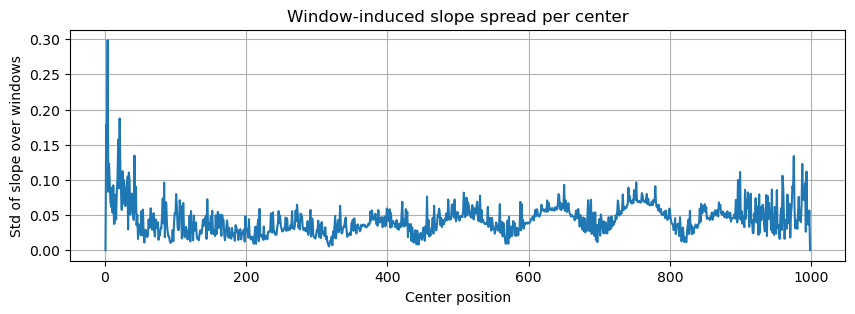

In [39]:
slope_std = np.nanstd(slopes, axis=1)

plt.figure(figsize=(10, 3))
plt.plot(slope_std)
plt.xlabel("Center position")
plt.ylabel("Std of slope over windows")
plt.title("Window-induced slope spread per center")
plt.grid(True)
plt.show()
